In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import math
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
NA_features = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
train[NA_features] = train[NA_features].fillna('NA')

<Figure size 3600x3600 with 0 Axes>

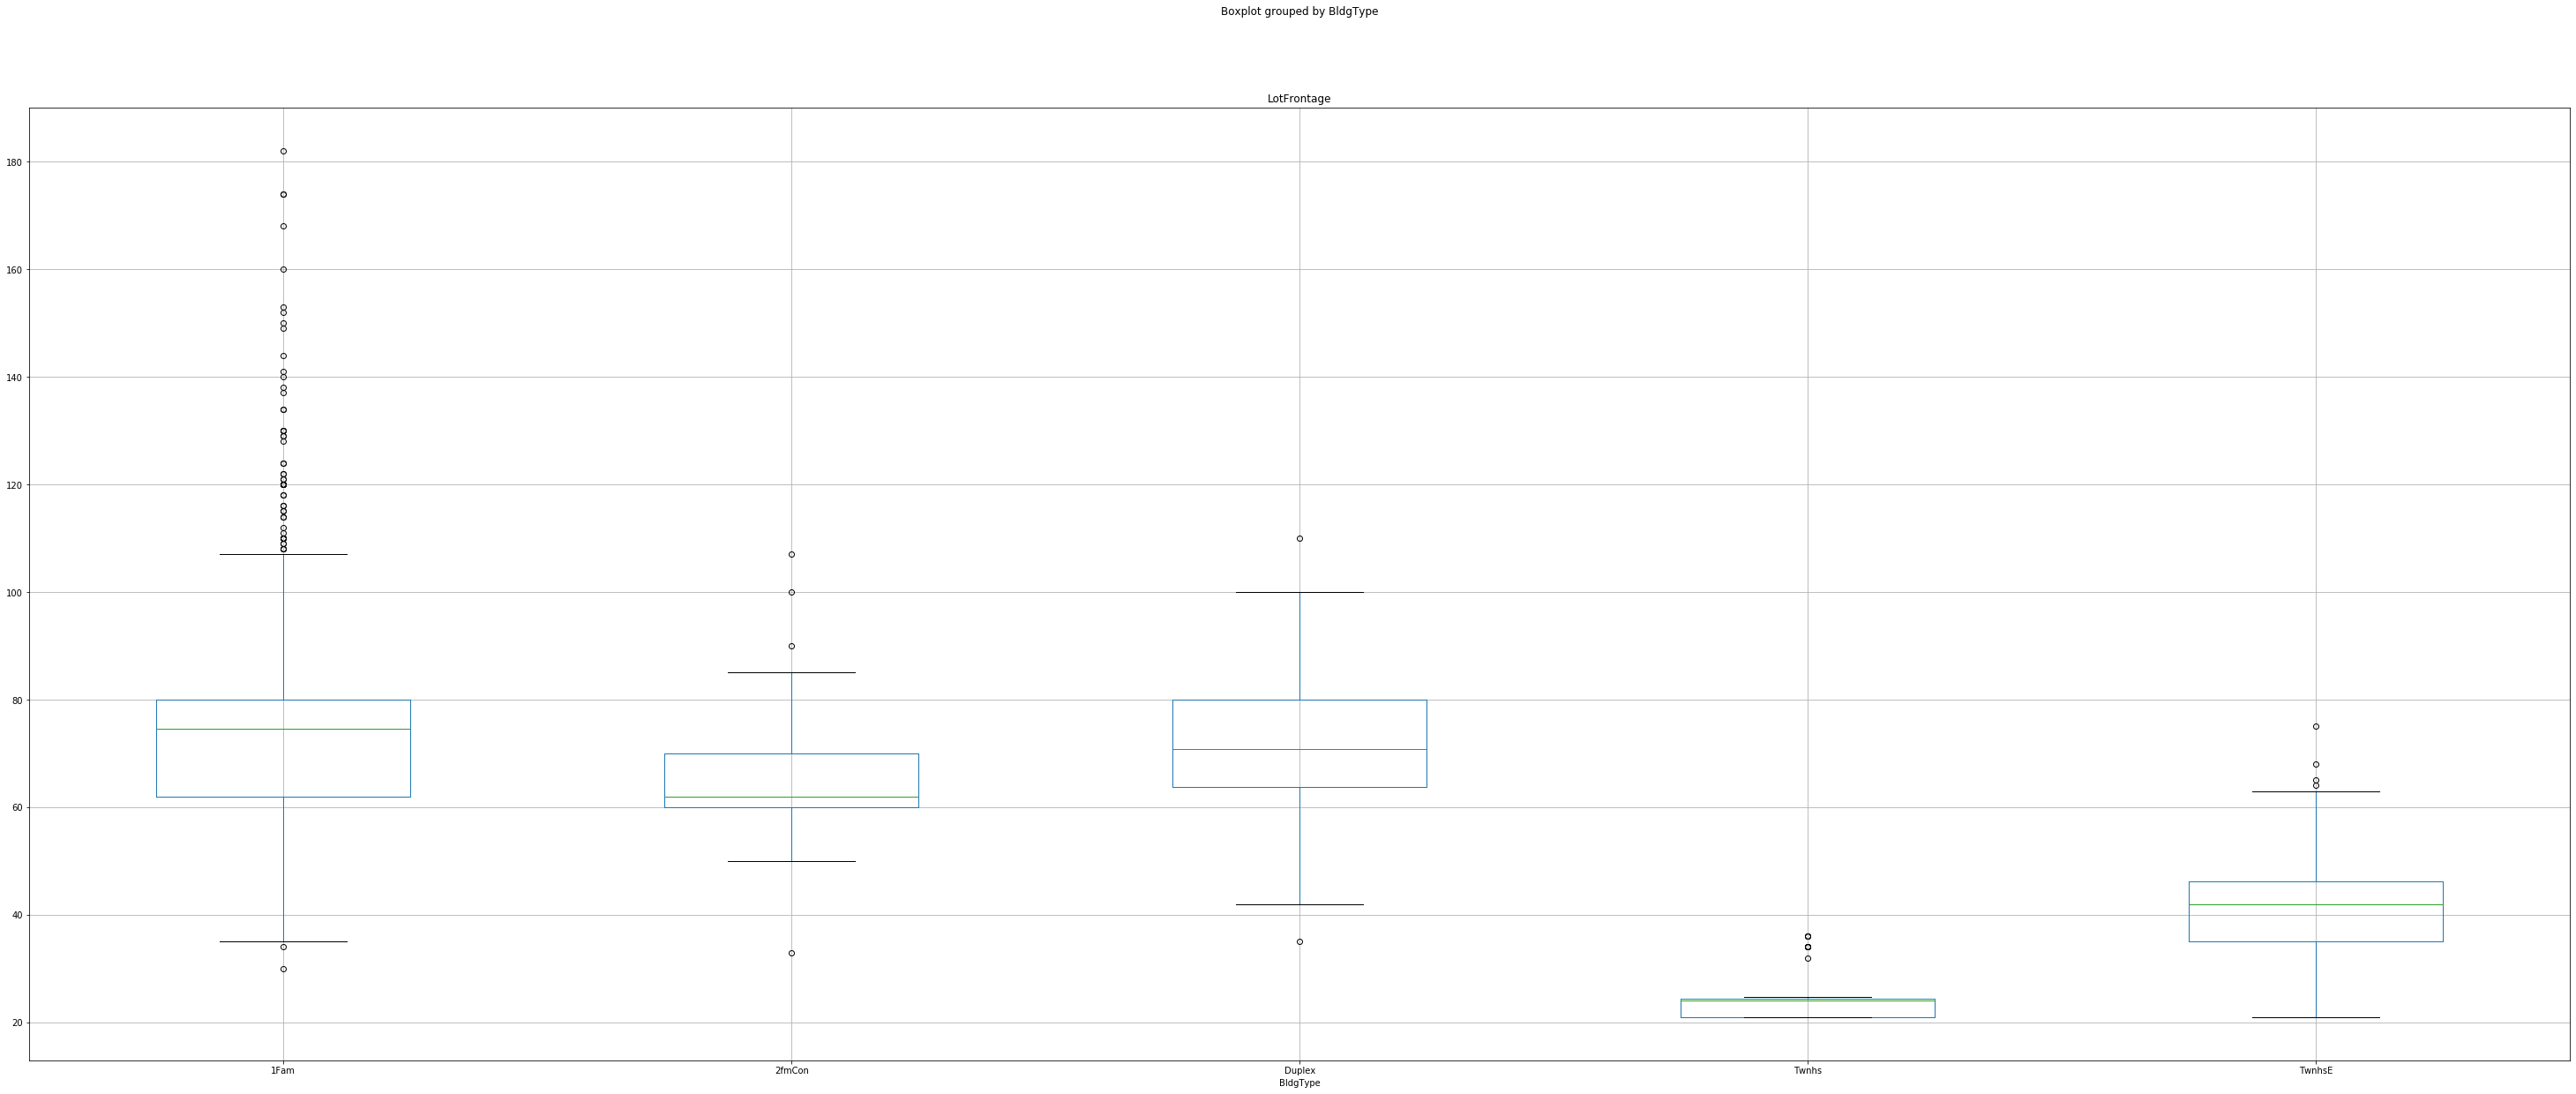

In [78]:
%matplotlib inline
num = train.select_dtypes(exclude=['object']).columns
train['LotFrontage'] = train.apply(lambda x: np.nan if x['LotFrontage'] > 200 else x['LotFrontage'], axis=1)
lf_means = train[['LotFrontage','BldgType']].groupby('BldgType').mean().to_dict()
train['LotFrontage'] = train.apply(lambda x: lf_means['LotFrontage'][x['BldgType']] if math.isnan(x['LotFrontage']) else x['LotFrontage'], axis=1)
fig = plt.figure(figsize=(50,50))
# train.boxplot(column='LotFrontage')
# train.hist(column='LotFrontage',bins=60)
# train['LotFrontageNorm2'] = train[['LotFrontage']].apply(lambda x: (x - x.mean()) / x.std())
train['LotFrontageNorm'] = train[['LotFrontage']].apply(st.zscore)
# train.hist(column= ['LotFrontageNorm'])
# train.loc[(train.LotFrontageNorm >= 4) | (train.LotFrontageNorm <= -4)]
train[['LotFrontageNorm','LotFrontage','SalePrice']].sort_values(by='LotFrontageNorm',ascending=False).head(30)

train.boxplot(column='LotFrontage',by='BldgType',figsize=(50,20))
# train.groupby(['Neighborhood']).count()
    